In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 32: Likelihood Ratio Tests

Last time, we introduced Likelihood Ratio tests. Recall that the point of a likelihood ratio test is to compare the likelihood function under a hypothesized value of the parameter with the liklihood function at its maximum. Instead of looking at the ratio $\Lambda$ itself, we often consider $-2\log \Lambda$ instead, since it has a handy distribution. 

### Example 1: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. Recall that the maximum likelihood estimate of $\lambda$ is $1\over\bar{X}$. We collect a random sample of size 20 and want to test the hypothesis $H_0: \lambda = 3$ vs $H_1: \lambda \neq 3$. Using the data in the python box below, conduct a likelihood ratio test on this hypothesis.  

In [3]:
my_data=np.array([0.18,0.277,0.105,0.126,0.225,0.026,0.123,0.423,0.006,0.281,0.050,0.692,0.105,0.275,0.346,0.079,0.045,0.222,0.063,0.281])

In [4]:
ml_est = 1/np.mean(my_data)
ml_like = 1
hyp_like = 1
for i in my_data:
    hyp_like = hyp_like*stats.expon.pdf(i,scale = 1/3)
    ml_like = ml_like*stats.expon.pdf(i,scale = 1/ml_est)
LR_Test = hyp_like/ml_like
chi_stat = -2*np.log(LR_Test)
stats.chi2.sf(chi_stat,1)

0.02982722919477516

...

#### Power

Suppose that the true value of $\lambda$ is 5. Let's determine the power of this test. Let $n=20$. Then determine the power if $n=50$. Remember, power is the probability of correctly rejecting the null hypothesis. 

First, find what value of $-2 \log \Lambda$ would lead you to reject $H_0$. This is sometimes called the critical value. 

In [5]:
Reject_Value = stats.chi2.ppf(0.95,1)
Reject_Value

3.841458820694124

Next, obtain the power. Obtain a sample of size 20 from the true population and obtain the value of $-2\log \Lambda$ for this sample. Repeat many times and determine how often you reject the null hypothesis. 

In [6]:
chi_stats = make_array()
for i in np.arange(10000):
    data = stats.expon.rvs(scale = 1/5,size=20)
    ml_est = 1/np.mean(data)
    ml_like = 1
    hyp_like = 1
    for i in data:
        hyp_like = hyp_like*stats.expon.pdf(i,scale = 1/3)
        ml_like = ml_like*stats.expon.pdf(i,scale = 1/ml_est)
    LR_Test = hyp_like/ml_like
    chi_stat = -2*np.log(LR_Test)
    chi_stats = np.append(chi_stats,chi_stat)
Power20 = sum(chi_stats >= Reject_Value)/len(chi_stats)
Power20

0.5966

Repeat for a sample size of 50. What do you expect to happen to power? 

In [18]:
chi_stats = make_array()
for i in np.arange(10000):
    data = stats.expon.rvs(scale = 1/5,size=50)
    ml_est = 1/np.mean(data)
    hyp_like = 3*e**(-3*data)
    ml_like = ml_est*e**(-ml_est*data)
    hyp_like = np.product(hyp_like)
    ml_like = np.product(ml_like)
    LR_Test = hyp_like/ml_like
    chi_stat = -2*log(LR_Test)
    chi_stats = np.append(chi_stats,chi_stat)
Power50 = sum(chi_stats >= Reject_Value)/len(chi_stats)
Power50

0.9542

### A Different Test

We've explored hypothesis tests in this class before. Taking advantage of our computing power, we don't have to rely on test statistics with asymptotic distributions. Let's conduct a more direct hypothesis test using simulation. Recall:

$$
H_0: \lambda = 3
$$

$$
H_1: \lambda \neq 3
$$

Pick a different test statistic. Obtain an empirical distribution of that test statistic under $H_0$. Next, find the $p$-value by determining how often this test statistic is at or further away from the test statistic derived from the sample. Remember that this is a two-sided test. 

C:\Users\C20Eric.Hembling\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0.1965

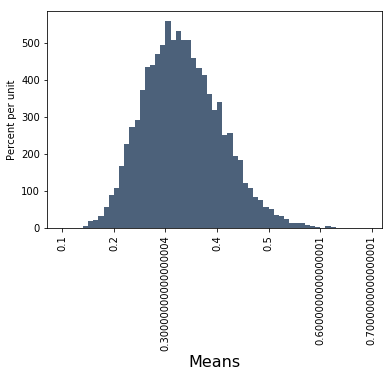

In [26]:
#Mean of the data
Test_Stat = np.mean(my_data)
Empir_Stats = make_array()
for i in np.arange(10000):
    Empir_Stats = np.append(Empir_Stats,np.mean(stats.expon.rvs(scale = 1/3,size = 20)))
Table().with_column('Means',Empir_Stats).hist(bins = np.arange(0.1,0.7,0.01))
Test_Stat

In [27]:
TwoSide_PValue = 2*sum(Empir_Stats<=Test_Stat)/10000
TwoSide_PValue

0.0374

How did the $p$-value compare to the LRT $p$-value? I wonder how the power of this test compares to our LRT. 

The p-value was higher than that of the LRT p-value.

#### Power

Let's figure out the power of this test. First, determine for what values of the test statistic would lead us to reject $H_0$. These values can be referred to as your rejection region. 

In [28]:
Right_Side = np.sort(Empir_Stats)[int(0.975*10000-1)]
Right_Side

0.49321909553093224

In [29]:
Left_Side = np.sort(Empir_Stats)[int(0.025*10000-1)]
Left_Side

0.20238245957295947

Now, determine the power of this test. Like in the LRT case, obtain a sample of size 20 and obtain the test statistic. Repeat many times and see how often your test statistic is in your rejection region. 

In [30]:
Test_stats = make_array()
for i in np.arange(100000):
    data = stats.expon.rvs(scale = 1/5,size=20)
    Testing_stat = np.mean(data)
    Test_stats = np.append(Test_stats,Testing_stat)
PowerTest20 = sum((Test_stats >= Right_Side)+(Test_stats <= Left_Side))/len(Test_stats)
PowerTest20

0.55158

Repeat for a sample size of 50. Note that you will have to obtain new critical values in order to do this.  

C:\Users\C20Eric.Hembling\Documents\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


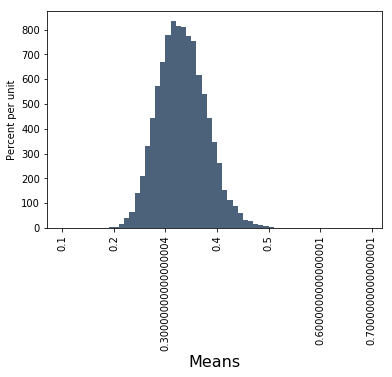

In [31]:
Empir_Stats = make_array()
for i in np.arange(10000):
    Empir_Stats = np.append(Empir_Stats,np.mean(stats.expon.rvs(scale = 1/3,size = 50)))
Table().with_column('Means',Empir_Stats).hist(bins = np.arange(0.1,0.7,0.01))

In [32]:
Right_Side = np.sort(Empir_Stats)[int(0.975*10000-1)]
Right_Side

0.4306124330586614

In [33]:
Left_Side = np.sort(Empir_Stats)[int(0.025*10000-1)]
Left_Side

0.24823369520436414

In [34]:
Test_stats = make_array()
for i in np.arange(100000):
    data = stats.expon.rvs(scale = 1/5,size=50)
    Testing_stat = np.mean(data)
    Test_stats = np.append(Test_stats,Testing_stat)
PowerTest50 = sum((Test_stats >= Right_Side)+(Test_stats <= Left_Side))/len(Test_stats)
PowerTest50

0.94856

Documentation: I continued to get a rather small value for the power of the LR test for a sample size of 50. I consulted with Erick Van Hegewald. Turns out using a for loop for the exact same calculations as vectorizing produces a floating point error which yields the incorrect answer. I did not change the ideas behind my calculations, just the exact method of coding them because of the floating point errors encountered.